In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("BSE SENSEX 50 (Jan 2017 to April 2025).csv")
print(data)

           Date      Open      High       Low     Close
0     02-Jan-17   8453.89   8464.18   8385.22   8431.50
1     03-Jan-17   8440.23   8480.63   8403.71   8456.12
2     04-Jan-17   8462.85   8478.53   8439.09   8448.29
3     05-Jan-17   8483.94   8543.13   8483.94   8532.00
4     06-Jan-17   8554.10   8569.24   8489.81   8498.77
...         ...       ...       ...       ...       ...
2040  25-Mar-25  24808.98  24914.02  24614.70  24694.99
2041  26-Mar-25  24705.50  24748.45  24460.74  24484.78
2042  27-Mar-25  24421.53  24632.33  24421.27  24597.89
2043  28-Mar-25  24618.05  24674.10  24473.61  24534.77
2044  01-Apr-25  24385.49  24589.85  24138.67  24168.86

[2045 rows x 5 columns]


Feature Engineering------------------------------------------------------------

In [3]:
print(data.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [4]:
print(data.dropna())

           Date      Open      High       Low     Close
0     02-Jan-17   8453.89   8464.18   8385.22   8431.50
1     03-Jan-17   8440.23   8480.63   8403.71   8456.12
2     04-Jan-17   8462.85   8478.53   8439.09   8448.29
3     05-Jan-17   8483.94   8543.13   8483.94   8532.00
4     06-Jan-17   8554.10   8569.24   8489.81   8498.77
...         ...       ...       ...       ...       ...
2040  25-Mar-25  24808.98  24914.02  24614.70  24694.99
2041  26-Mar-25  24705.50  24748.45  24460.74  24484.78
2042  27-Mar-25  24421.53  24632.33  24421.27  24597.89
2043  28-Mar-25  24618.05  24674.10  24473.61  24534.77
2044  01-Apr-25  24385.49  24589.85  24138.67  24168.86

[2045 rows x 5 columns]


In [5]:
print(data.duplicated())
print(data.drop_duplicates())

0       False
1       False
2       False
3       False
4       False
        ...  
2040    False
2041    False
2042    False
2043    False
2044    False
Length: 2045, dtype: bool
           Date      Open      High       Low     Close
0     02-Jan-17   8453.89   8464.18   8385.22   8431.50
1     03-Jan-17   8440.23   8480.63   8403.71   8456.12
2     04-Jan-17   8462.85   8478.53   8439.09   8448.29
3     05-Jan-17   8483.94   8543.13   8483.94   8532.00
4     06-Jan-17   8554.10   8569.24   8489.81   8498.77
...         ...       ...       ...       ...       ...
2040  25-Mar-25  24808.98  24914.02  24614.70  24694.99
2041  26-Mar-25  24705.50  24748.45  24460.74  24484.78
2042  27-Mar-25  24421.53  24632.33  24421.27  24597.89
2043  28-Mar-25  24618.05  24674.10  24473.61  24534.77
2044  01-Apr-25  24385.49  24589.85  24138.67  24168.86

[2045 rows x 5 columns]


In [6]:
df=pd.DataFrame(data,columns=["Date","Open","High","Low","Close"])
print(df)

           Date      Open      High       Low     Close
0     02-Jan-17   8453.89   8464.18   8385.22   8431.50
1     03-Jan-17   8440.23   8480.63   8403.71   8456.12
2     04-Jan-17   8462.85   8478.53   8439.09   8448.29
3     05-Jan-17   8483.94   8543.13   8483.94   8532.00
4     06-Jan-17   8554.10   8569.24   8489.81   8498.77
...         ...       ...       ...       ...       ...
2040  25-Mar-25  24808.98  24914.02  24614.70  24694.99
2041  26-Mar-25  24705.50  24748.45  24460.74  24484.78
2042  27-Mar-25  24421.53  24632.33  24421.27  24597.89
2043  28-Mar-25  24618.05  24674.10  24473.61  24534.77
2044  01-Apr-25  24385.49  24589.85  24138.67  24168.86

[2045 rows x 5 columns]


In [7]:
data['Daily_Return']=data['Close'].pct_change()
print(data['Daily_Return'].head())

0         NaN
1    0.002920
2   -0.000926
3    0.009909
4   -0.003895
Name: Daily_Return, dtype: float64


In [8]:
import numpy as np

data['Log_Return'] = np.log(data['Close'] / data['Close'].shift(1))
print(data['Log_Return'])

0            NaN
1       0.002916
2      -0.000926
3       0.009860
4      -0.003902
          ...   
2040   -0.000367
2041   -0.008549
2042    0.004609
2043   -0.002569
2044   -0.015026
Name: Log_Return, Length: 2045, dtype: float64


In [9]:
data['Volatility_20d'] = data['Daily_Return'].rolling(window=20).std()
print(data['Volatility_20d'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2040    0.008378
2041    0.008201
2042    0.008210
2043    0.008251
2044    0.007652
Name: Volatility_20d, Length: 2045, dtype: float64


In [10]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

In [11]:
print(data[['Close', 'Daily_Return', 'Log_Return', 'Volatility_20d', 'MA_20', 'MA_50']].head())


     Close  Daily_Return  Log_Return  Volatility_20d  MA_20  MA_50
0  8431.50           NaN         NaN             NaN    NaN    NaN
1  8456.12      0.002920    0.002916             NaN    NaN    NaN
2  8448.29     -0.000926   -0.000926             NaN    NaN    NaN
3  8532.00      0.009909    0.009860             NaN    NaN    NaN
4  8498.77     -0.003895   -0.003902             NaN    NaN    NaN


Exploratory Data Analysis--------------------------------------------

plot stock price over time--------------------------------------------

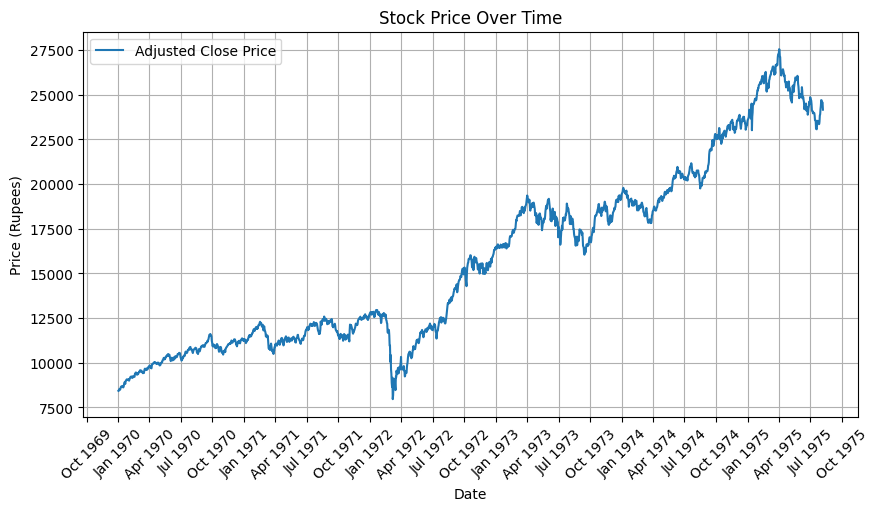

In [14]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Adjusted Close Price')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Rupees)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


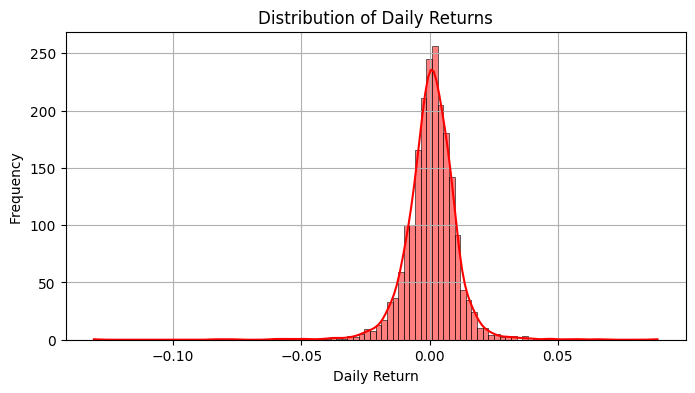

In [15]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(data['Daily_Return'], bins=100, kde=True, color='Red')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency ')
plt.grid(True)
plt.show()

In [16]:
Q1 = data['Daily_Return'].quantile(0.25)
Q3 = data['Daily_Return'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = data[(data['Daily_Return'] < lower_bound) | (data['Daily_Return'] > upper_bound)]

print(f"Number of outliers (IQR method): {len(outliers_iqr)}")

Number of outliers (IQR method): 85


c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


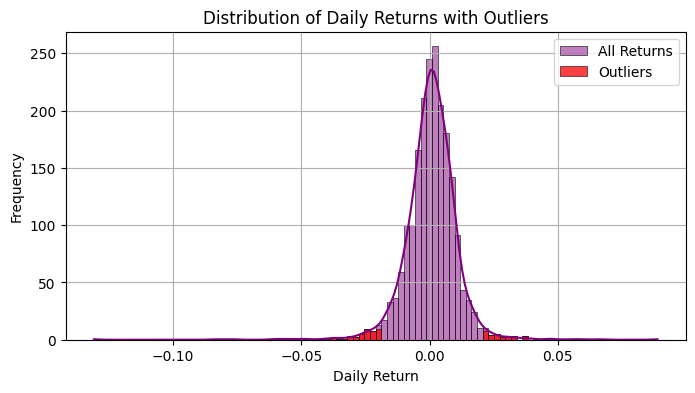

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(data['Daily_Return'], bins=100, kde=True, color='purple', label='All Returns')

sns.histplot(outliers_iqr['Daily_Return'], bins=100, color='red', label='Outliers')

plt.title('Distribution of Daily Returns with Outliers')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

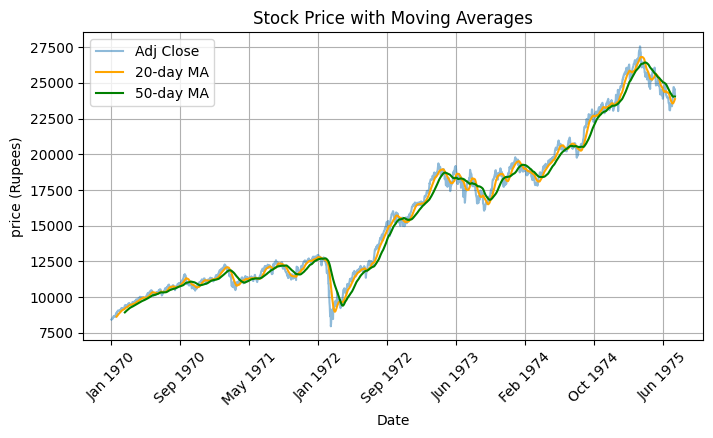

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(data['Close'], label='Adj Close', alpha=0.5)
plt.plot(data['MA_20'], label='20-day MA', color='orange')
plt.plot(data['MA_50'], label='50-day MA', color='green')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.xlabel('Date')
plt.ylabel('price (Rupees)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

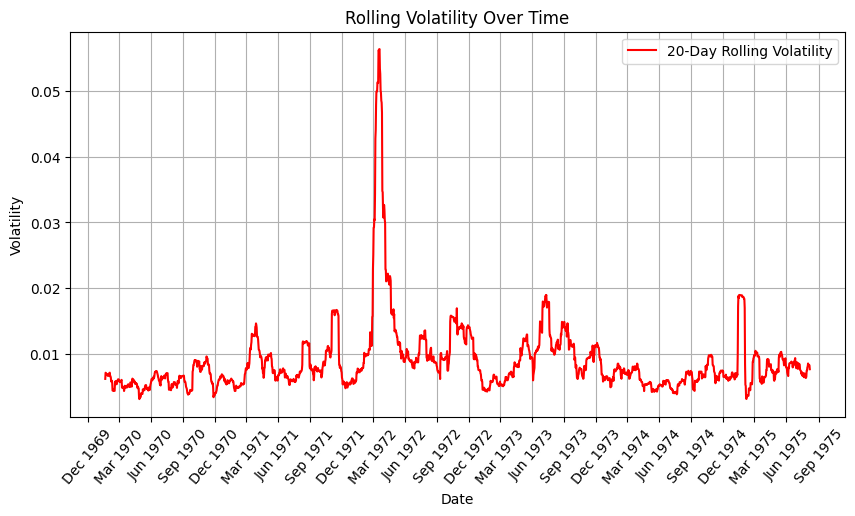

In [19]:
plt.figure(figsize=(10,5))
plt.plot(data['Volatility_20d'], label='20-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility Over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.xticks(rotation=50)
plt.show()

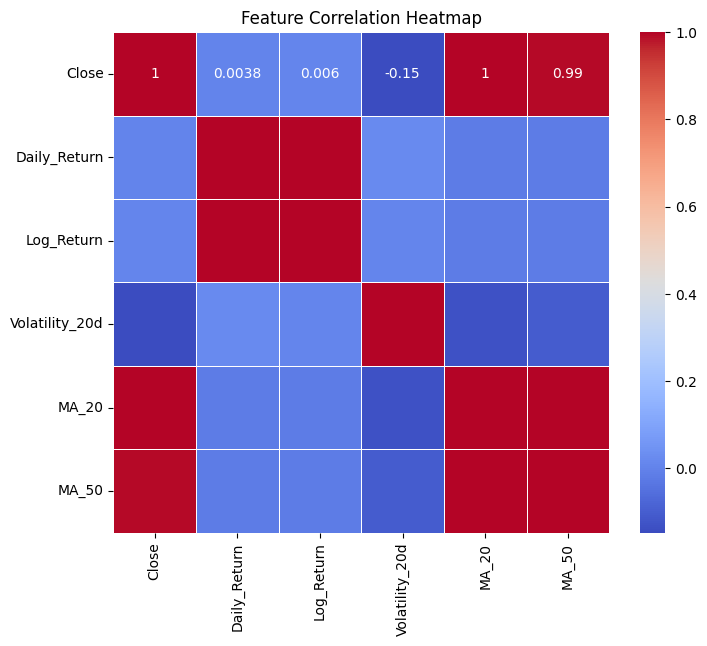

In [20]:
plt.figure(figsize=(8, 6.5))
sns.heatmap(data[['Close', 'Daily_Return', 'Log_Return', 'Volatility_20d', 'MA_20', 'MA_50']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

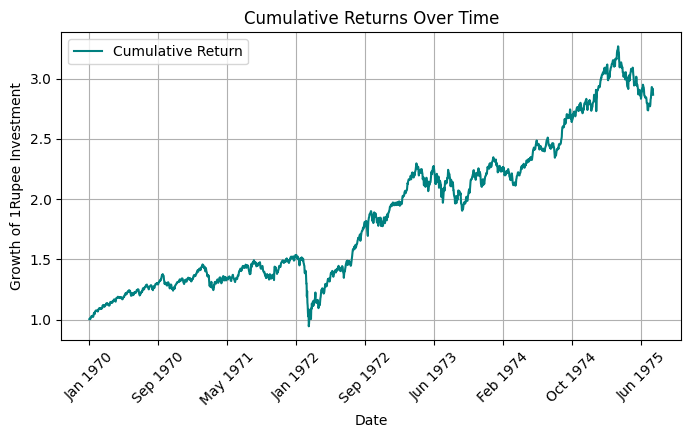

In [21]:
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

plt.figure(figsize=(8,4))
plt.plot(data['Cumulative_Return'], label='Cumulative Return', color='teal')
plt.title('Cumulative Returns Over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xlabel('Date')
plt.ylabel('Growth of 1Rupee Investment')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the PINN loss function (combining physics + data)
def pinn_loss(predicted_prices, actual_prices, predicted_derivatives, mu):
    """
    PINN loss = Data loss (MSE) + Physics loss (GBM residual)
    """
    # Data loss (difference between predicted and actual stock prices)
    data_loss = torch.mean((predicted_prices - actual_prices) ** 2)

    # Physics loss (GBM residual: dS/dt - mu*S should be close to zero)
    physics_loss = torch.mean((predicted_derivatives - mu * predicted_prices) ** 2)

    # Combine losses
    total_loss = data_loss + physics_loss
    return total_loss

loss = pinn_loss(predicted_prices, actual_prices, predicted_derivatives, mu)
print(loss.item())

NameError: name 'predicted_prices' is not defined

In [22]:
!pip install torch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import torch
import torch.nn as nn
import torch.autograd as autograd


features = ["Open", "High", "Low", "Close"]
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
df_scaled["t"] = (df.index - df.index.min()) / (df.index.max() - df.index.min())

# Step 3: PINN Model
class StockPINN(nn.Module):
    def __init__(self):
        super(StockPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

# Data for PINN
X_pinn = torch.tensor(df_scaled[["t", "Open", "High", "Low", "Close"]].values, dtype=torch.float32, requires_grad=True)
y_pinn = torch.tensor(df_scaled["Close"].values, dtype=torch.float32).view(-1, 1)

# Loss function for PINN
alpha = torch.tensor(0.1, requires_grad=True)
beta = torch.tensor(0.01, requires_grad=True)
model_pinn = StockPINN()

def pinn_loss(model, X, y_true):
    S_pred = model(X)
    dS_dt = autograd.grad(S_pred, X[:, 0], torch.ones_like(S_pred), create_graph=True,allow_unused=True)[0] 
    if dS_dt is None:
        dS_dt = torch.zeros_like(S_pred)
    physics_residual = dS_dt - (alpha * S_pred + beta)
    data_loss = torch.mean((S_pred - y_true)**2)
    physics_loss = torch.mean(physics_residual**2)
    return data_loss + physics_loss, S_pred

#PINN
optimizer = torch.optim.Adam(list(model_pinn.parameters()) + [alpha, beta], lr=0.01)
for epoch in range(5000):
    optimizer.zero_grad()
    loss, _ = pinn_loss(model_pinn, X_pinn, y_pinn)
    loss.backward()
    optimizer.step()

_, y_pred_pinn = pinn_loss(model_pinn, X_pinn, y_pinn)
y_pred_pinn_np = y_pred_pinn.detach().numpy()

X_ml = df_scaled[["Open", "High", "Low", "t"]]
y_ml = df_scaled["Close"]

# Linear Regression
lr_model = LinearRegression().fit(X_ml, y_ml)
y_pred_lr = lr_model.predict(X_ml)

# Random Forest
rf_model = RandomForestRegressor(random_state=42).fit(X_ml, y_ml)
y_pred_rf = rf_model.predict(X_ml)

# SVR
svr_model = SVR().fit(X_ml, y_ml)
y_pred_svr = svr_model.predict(X_ml)

def evaluate(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

results = {
    "PINN": evaluate(y_ml, y_pred_pinn_np),
    "Linear Regression": evaluate(y_ml, y_pred_lr),
    "Random Forest": evaluate(y_ml, y_pred_rf),
    "SVR": evaluate(y_ml, y_pred_svr)
}

results_df = pd.DataFrame(results).T
print(results_df)


                        MSE        R2
PINN               0.000004  0.999937
Linear Regression  0.000006  0.999909
Random Forest      0.000002  0.999967
SVR                0.001386  0.979592
